# Aula 21 - Teste de permutação

O teste de permutação permite fazer estatísticas de *duas amostras*, por exemplo para concluir se são diferentes.

Junto com o *bootstrap*, pertencem às técnicas de análise estatística por reamostragem.

In [14]:
%matplotlib inline

import pandas as np
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
import random
from scipy.stats import percentileofscore # função reversa do np.percentile

### Exercício 1
___

Uma fábrica realizou uma calibração em uma máquina na linha de produção. A equipe que realizou os ajustes afirmou que após a calibração, a máquina ainda manteve o mesmo tempo médio de produção. Para verificar se realmente o tempo médio permaneceu inalterado, foram realizadas duas medidas de tempo: uma antes e uma depois da calibração. 

Foram selecionadas 7 e 8 peças aleatorianente para as medidas antes e depois da calibração, repectivamente. Elas estão representadas abaixo pelas séries xA e xB, respectivamente.

Assuma que o tempo de produção de uma peça possui uma distribuição normal e que o desvio padrão realmente permaneceu inalterado, contudo desconhecido.

In [2]:
xA =   [ 47.66708824,  48.11337801,  47.83104582,  46.69416928,
        48.70934634,  45.61498917,  51.79239414]
xB =   [ 52.82692462,  49.60021673,  50.23705478,  49.65527133,
        49.78115306,  49.81176314,  53.04044198,  48.6253753 ]



**a.** Calcular a diferença entre os tempos médios depois e antes da calibração. Nomeie essa diferença entre as médias amostrais originais de $d_{obs}$.

In [3]:
dobs =  # complete
print("A diferença das médias observada de depois e antes: %f" % dobs)

A diferença das médias observada de depois e antes: 2.386931


___
Como os dois conjuntos representam uma pequena amostra da população, não é possível inferir que essa seja a real diferença entre as médias das duas variáveis aleatórias. Portanto é desejável aferir se realmente a diferença é zero, com um nível de significância de 5%.

**b.** Formule a hipótese nula e a hipótese alternativa em termos do problema e dos parâmetros:
\begin{equation*}
   H_0:\mbox{Calibração não alterou produção} \rightarrow \mu_B=\mu_A \rightarrow \mu_B-\mu_A=0
\end{equation*}   
\begin{equation*}
   H_a:\mbox{Calibração alterou produção} \rightarrow \mu_B\neq\mu_A \rightarrow \mu_B-\mu_A\neq0
\end{equation*}

___
## Teste de permutação

Não há qualquer informação acerca do desvio padrão populacional. Ainda, a amostra contém poucos dados. Para concluir se a hipótese nula será ou não rejeitada, antes de realizar um teste convencional, o aluno decidiu realizar um **Teste de Permutação**.

Nesse teste, a ideia consiste em permutar os dados das duas amostras, ou seja, embaralhar os valores contidos em $x_A$ e $x_B$ e criar novas amostras. 

### Caso 1
Ambas as amostras possuem a mesma unidade de medida e a ordem dos elementos nas amostras não é importante.

monta-se uma única lista com a união dos dados em $x_A$ e $x_B$
Repetir $n$ vezes:
* embaralha-se a lista 
* separa-se novamente respeitando os tamanhos originais de cada amostra ($n_A$ e $n_B$).
* Calcule a diferença entre as médias de $x_B$ e $x_A$ (ou outra estatística de $A$  e $B$)
* armazene a diferença (ou a estatística de interesse)

Use o histograma e os dados das diferenças obtidas para tomar a decisão raciocinando com base em intervalos de confiança e percentis.

Observação:
* Note que os tamanhos amostrais não precisam ser necessariamente iguais.
* Vale para **qualquer estatística de duas amostras**, não só para a média

### Caso 2
As séries possuem unidades de medida diferentes ou o teste em questão exige uma certa ordem dos dados entre as amostras (por exemplo: teste de correlação)

Repetir $n$ vezes:
* embaralha-se apenas uma das amostras
* Calcule a estatística usando  $x_B$ e $x_A$, uma das quais terá sido permutada
* armazene o valor da estatística das duas amostras

Use o histograma e os dados das diferenças obtidas para tomar a decisão raciocinando com base em intervalos de confiança e percentis.

### Explosão combinatória

Idealmente, é desejável a realização de todas as permutações possíveis. Nem sempre é viável.

No caso do exemplo, os tamanhos das duas amostras são $n_A=7$ e $n_B=8$, temos que o número de combinações possíveis é 15!, ou mais de 1,3 trilhão de possibilidades, tornando a solução computacionalmente inviável.

**c.** Monte um programa para realizar o teste de permutação (considerando o Caso 1) para 100 mil iterações. Utilize o comando `np.random.shuffle()` para embaralhar a lista contendo a união dos dados em $x_A$ e $x_B$.

In [6]:
#Permutation test

nA = len(xA)
nB = len(xB)

#juntar as duas listas
xAB = xA + xB

#número de permutações, o ideal seria (m+n)! mas seria inviável.
t = 100000

perm = [] # lista para guardar os resultados
for i in range(0,t):
    #Embaralhe o xy

    # Depois de embaralhar, separe as listas e calcule a dif de medias entre o x e o y embaralhado e separado
    


**d.** Exibir o histograma das diferenças entre as médias permutadas.

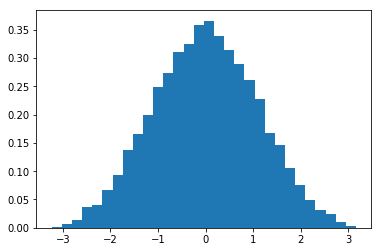

In [11]:
# faça o hist

**e.** Calcule o valor-p do *teste de permutação*.


Lembre que: 
* O teste é bicaudal de acordo com a hipótese alterativa ($H_a:\mu_B-\mu_A\neq0$)
* Interessam os casos em que $d_{obs}>0$, a proporção dos casos em que as diferenças entre as médias permutadas foram **maiores** do que a diferença $d_{obs}$ observada no item a
* Também interessam os casos em que $d_{obs}<0$, ou seja, a proporção dos casos em que a  as diferenças entre as médias permutadas foram **menores** do que a diferença $d_{obs}$ observada no item a
* Note que você não pode simplesmente calcular uma das duas caudas e dobrar o valor. ** Por quê?**.

**Faça uma conclusão do teste de hipóteses**

Assuma um nível de significância $\alpha$ coerente

In [27]:

# Dica: a função percentileofscore do scipy.stats pode te ajudar. 
# Dica 2: ela retorna em %. Precisa dividir por 100
# Dica 3: Calcule a cauda direita e a esquerda. Não multiplique por dois


### Exercício 2

Um aluno comprou um acelerômetro para usar com o seu Arduino. O acelerômetro mede forças específicas em 3 eixos ortogonais, normalmente representados por x, y e z. 

Caso o eixo z esteja perfeitamente alinhado com a vertical local, irá medir a reação à gravidade, ou seja, aproximadamente $-9.8\ m/s^2$ mais um certo ruido. Já os eixos x e y, que formam um plano paralelo ao solo, devem medir:
$$x = 0\ m/s^2 + v$$ $$y = 0\ m/s^2 + w$$ 
Onde v e w são ruídos com uma distribuição e parâmetros desconhecidos.

Assumindo que os ruídos tenham uma distribuição normal, para uma melhor filtragem desses ruídos é desejável que a correlação desses ruídos seja próxima de zero. Para verificar se o acelerômetro possui ruídos descorrelacionados, o aluno realizou então 15 medidas de x e y e obteve os seguintes resultados (em $m/s^2$):

In [38]:
x =   [-1.06004531,  0.90985503,  1.01145345,  0.81447903, -0.37231968,
       -0.90004095, -2.08026056, -1.72278038, -0.32815854,  1.64216522,
        0.64785021, -0.21609776, -1.1309649 ,  1.95599004, -0.3579645]
y =   [-0.34166037,  0.25990444,  1.70860138,  0.66344894,  0.08912057,
       -0.41922063, -1.43918702, -3.07618301,  0.02229978,  1.32291735,
        0.33505524,  0.29741423, -0.54275277,  -1.47918228,  0.37008527]

a. Calcular a correlação entre x e y (correlação de Pearson):

In [15]:
robs = stats.pearsonr(x, y)[0]
print("Correlação observada de x e z: %f" % robs)

Correlação observada de x e z: 0.425674


Como os dois conjuntos representam uma pequena amostra da população, não é possível inferir que essa seja a real correlação entre as duas variáveis aleatórias. Portanto é desejável aferir se realmente a correlação é zero, ou seja os sinais são descorrelacionados, com um nível de significância de 5%.

b. Formular a hipótese nula e a hipótese alternativa do problema:
\begin{equation*}
   H_0: r = 0
\end{equation*}   
\begin{equation*}
   H_a: r \neq 0
\end{equation*}

Não há qualquer informação do fabricante acerca do desvio padrão populacional. Ainda, a amostra contém poucos dados. Para concluir se a hipótese nula será ou não rejeitada, o aluno decidiu realizar um Teste de Permutação.

A ideia consiste em permutar os dados em uma das séries (**Caso 2** exposto acima). Logo, os novos pares de dados permutados (x,y) serão diferentes e consequentemente a correlação entre x e y também mudará. 
A cada iteração a nova correlação é medida e armazenada em uma lista. Ao final é possível montar um histograma que representa a distribuição da correlação entre x e y.
Idealmente é desejável a realização de todas as permutações possíveis, porém com 15 amostras, o número de combinações possíveis é 15!, ou mais de 1,3 trilhão de possibilidades, tornando a solução computacionalmente inviável.

c. Montar o programa para realizar o teste de permutação para 100 mil iterações. Utilizar o comando random.shuffle() para embaralhar uma lista.

In [16]:
#Permutation test

#número de permutações, o ideal seria m! mas seria inviável.
n = 100000

perm = []
for i in range(0,n):
    #Embaralhar o z, mas manter o x
    
    #calcular a correlação entre o x e o y embaralhado


d. Exibir o histograma da correlação medida no teste de permutação. Lembre-se que o valor da correlação estará contido no intervalo [-1,1].

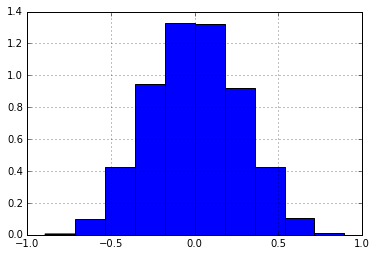

e. Calcular o valor-p da correlação observada no item 1

P-value através do teste de permutação: 0.058010


f. Concluir o teste de hipóteses